In [2]:
# Check to see how many file types are in the train folder (jpg, png, gif, ...)

import os

folder_path = '.../Data/Dataset/devset_images/trainset_images'

file_types = {}

for filename in os.listdir(folder_path):
    _, file_extension = os.path.splitext(filename)
    if file_extension.lower() in ['.jpg', '.jpeg', '.png', '.gif']:
        if file_extension.lower() not in file_types:
            file_types[file_extension.lower()] = 0
        file_types[file_extension.lower()] += 1

for file_type, count in file_types.items():
    print(f"Number of file {file_type}: {count}")

Number of file .jpg: 5265
Number of file .gif: 5
Number of file .png: 10


In [3]:
import os
import shutil
from PIL import Image

def convert_and_copy_images(src, dest):
    if not os.path.exists(src):
        print(f"Source directory '{src}' does not exist.")
        return

    os.makedirs(dest, exist_ok=True)

    for filename in os.listdir(src):
        src_file_path = os.path.join(src, filename)
        if filename.lower().endswith('.png') or filename.lower().endswith('.gif'):
            img = Image.open(src_file_path)
            if img.mode in ("RGBA", "P"):
                img = img.convert("RGB")
            dest_file_path = os.path.join(dest, os.path.splitext(filename)[0] + '.jpg')
            img.save(dest_file_path, 'JPEG')
            print(f"Converted and copied '{filename}' to '{dest_file_path}'")
        elif filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg'):
            dest_file_path = os.path.join(dest, filename)
            shutil.copy2(src_file_path, dest_file_path)
            print(f"Copied '{filename}' to '{dest_file_path}'")
        else:
            print(f"Skipped '{filename}' (not a PNG, JPG, or GIF file)")

src_directory = '.../Data/Dataset/devset_images/trainset_images'
dest_directory = '.../Data/Dataset/Training_set'

convert_and_copy_images(src_directory, dest_directory)

Copied '10002110906.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10002110906.jpg'
Copied '10009244396.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10009244396.jpg'
Copied '10018187456.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10018187456.jpg'
Copied '10018988015.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10018988015.jpg'
Copied '10027248316.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10027248316.jpg'
Copied '10033993185.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10033993185.jpg'
Copied '10037740784.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10037740784.jpg'
Copied '100556251.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\100556251.jpg'
Copied '10074303973.jpg' to 'C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set\10074303973.jpg'
Copied '1008213420.jpg' to 'C:\Users\ACER

In [4]:
def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']
    image_count = 0

    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

    return image_count

folder_path = '.../Data/Dataset/Training_set'

num_images = count_images_in_folder(folder_path)
print(f'Folder "{folder_path}" have {num_images} images.')



Folder "C:\Users\ACER\Desktop\Lab1_DPL302m\Data\Dataset\Training_set" have 5280 images.


In [5]:
#Check the records in the devset_images_gt.csv file (Make sure the number of records is equal to the number of records in the train folder)

import csv

csv_file_path = '.../Data/Dataset/devset_images_gt.csv'

total_records = 0
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        total_records += 1

print("Total of number row in CSV:", total_records)

Total of number row in CSV: 5281


In [6]:
import os
import random
import shutil

# Define the paths
original_folder = '.../Data/Dataset/Training_set'
train_folder = '.../Data/Dataset/foder_train\train'
validation_folder = '.../Data/Dataset/foder_train\validation'

# Create directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# List all files in the original folder
file_names = os.listdir(original_folder)

# Calculate the number of files for each split
total_files = len(file_names)
train_size = int(0.8 * total_files)
validation_size = total_files - train_size

# Shuffle the list of files
random.shuffle(file_names)

# Move files to respective directories
for i, file_name in enumerate(file_names):
    source_path = os.path.join(original_folder, file_name)
    if i < train_size:
        destination_folder = train_folder
    else:
        destination_folder = validation_folder
    destination_path = os.path.join(destination_folder, file_name)
    shutil.move(source_path, destination_path)

print("Divided folder into train and validation folders.")


Divided folder into train and validation folders.


In [7]:
# Assign label to each folder

def create_subfolders(source_folder, csv_file_path):
    id_label_dict = {}
    with open(csv_file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            filename, label = row
            filename += ".jpg"
            id_label_dict[filename] = label

    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        if filename in id_label_dict:
            label = id_label_dict[filename]
            if label == '1':
                destination_folder = os.path.join(source_folder, 'flooding')
            elif label == '0':
                destination_folder = os.path.join(source_folder, 'no_flooding')
            else:
                print(f"Label không hợp lệ cho tệp {filename}.")
                continue
            os.makedirs(destination_folder, exist_ok=True)
            destination_path = os.path.join(destination_folder, filename)
            shutil.move(source_path, destination_path)


train_folder = '.../Data/Dataset/foder_train/train'
validation_folder = '.../Data/Dataset/foder_train/validation'


csv_file_path = '.../Data/Dataset/devset_images_gt.csv'

create_subfolders(train_folder, csv_file_path)
create_subfolders(validation_folder, csv_file_path)


print("Divided the folder into flooding and no_flooding subfolders based on labels in the CSV file.")

Divided the folder into flooding and no_flooding subfolders based on labels in the CSV file.


Train counts: {'flooding': 1552, 'no_flooding': 2672}
Validation counts: {'flooding': 368, 'no_flooding': 688}


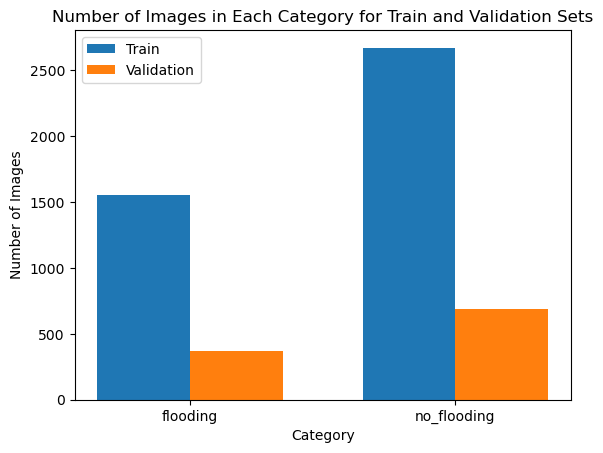

In [8]:
import os
import matplotlib.pyplot as plt

def count_images_in_categories(folder_path):
    categories = ['flooding', 'no_flooding']
    counts = {}
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.exists(category_path):
            counts[category] = len(os.listdir(category_path))
        else:
            counts[category] = 0
    return counts

def plot_distribution(train_counts, validation_counts):
    categories = ['flooding', 'no_flooding']
    train_values = [train_counts[category] for category in categories]
    validation_values = [validation_counts[category] for category in categories]
    
    x = range(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar(x, train_values, width, label='Train')
    ax.bar([p + width for p in x], validation_values, width, label='Validation')
    
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Images')
    ax.set_title('Number of Images in Each Category for Train and Validation Sets')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(categories)
    ax.legend()
    
    plt.show()

train_folder = '.../Data/Dataset/foder_train/train'
validation_folder = '.../Data/Dataset/foder_train/validation'

# Count images in each category for train and validation sets
train_counts = count_images_in_categories(train_folder)
validation_counts = count_images_in_categories(validation_folder)

# Print the counts for verification
print("Train counts:", train_counts)
print("Validation counts:", validation_counts)

# Plot the distribution
plot_distribution(train_counts, validation_counts)
